#Report Lab06

- Nguyễn Quốc Tiến - 20280098
- Dương Vi Doanh   - 20280018

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import copy
import timeit
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from xgboost import XGBClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [138]:
data = "/content/sample_data/churn_rate_prediction.csv"
dataset_train=pd.read_csv(data)
dataset_train_copy=dataset_train.copy()

In [139]:
dataset_train_copy.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


In [140]:
dataset_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [141]:
dataset_train_copy.isnull().sum()

customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

- region_category, preferred_offer_types, points_in wallet have missing value, may be is null, 'Unknow' or 'Eror'

In [142]:
dataset_train_copy.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,33549.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,3.463397
std,15.867412,228.819900,398.289149,19444.806226,194.063624,1.409661
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,-1.000000
25%,23.000000,8.000000,60.102500,14177.540000,616.150000,3.000000
50%,37.000000,12.000000,161.765000,27554.485000,697.620000,4.000000
75%,51.000000,16.000000,356.515000,40855.110000,763.950000,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,5.000000


- some cols have missing values have diffend mean and med
- cols have min too far is have outlier values

# PREPROCESSING

In [143]:
# Removing In-significant features
df1 = dataset_train_copy.drop(['security_no','Name','referral_id','last_visit_time','customer_id'], axis=1)
df1.head(2)

,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,F,Village,Platinum Membership,2017-08-17,No,Gift Vouchers/Coupons,?,Wi-Fi,17,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,32,F,City,Premium Membership,2017-08-28,?,Gift Vouchers/Coupons,Desktop,Mobile_Data,16,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1


In [144]:
df1.isnull().sum().sum()

9159

In [145]:
df1['gender'].value_counts()

F          18490
M          18443
Unknown       59
Name: gender, dtype: int64

In [146]:
df1['gender'] = df1['gender'].replace('Unknown', np.nan)
df1['gender'].value_counts()

F    18490
M    18443
Name: gender, dtype: int64

In [147]:
df1['region_category'].value_counts()

Town       14128
City       12737
Village     4699
Name: region_category, dtype: int64

In [148]:
df1['medium_of_operation'] = df1['medium_of_operation'].replace('?', np.nan)
df1['medium_of_operation'].value_counts()

Desktop       13913
Smartphone    13876
Both           3810
Name: medium_of_operation, dtype: int64

In [149]:
df1['internet_option'].value_counts()

Wi-Fi          12413
Mobile_Data    12343
Fiber_Optic    12236
Name: internet_option, dtype: int64

In [150]:
df1['used_special_discount'].value_counts()

Yes    20342
No     16650
Name: used_special_discount, dtype: int64

In [151]:
df1['past_complaint'].value_counts()

No     18602
Yes    18390
Name: past_complaint, dtype: int64

In [152]:
df1['feedback'].value_counts()

Poor Product Quality        6350
No reason specified         6290
Too many ads                6279
Poor Website                6271
Poor Customer Service       6252
Reasonable Price            1417
User Friendly Website       1391
Products always in Stock    1382
Quality Customer Care       1360
Name: feedback, dtype: int64

In [153]:
df1.columns

Index(['age', 'gender', 'region_category', 'membership_category',
       'joining_date', 'joined_through_referral', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'days_since_last_login',
       'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days',
       'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')

In [154]:
df1['avg_frequency_login_days'] = df1['avg_frequency_login_days'].replace('Error', np.nan)
df1['avg_frequency_login_days'].value_counts()

13.0                   1394
19.0                   1365
8.0                    1361
14.0                   1355
17.0                   1349
                       ... 
28.191570401129514        1
41.73357294995208         1
-11.515939810499656       1
45.71683637272365         1
27.8399274405269          1
Name: avg_frequency_login_days, Length: 1653, dtype: int64

In [155]:
df1['avg_frequency_login_days'] = df1['avg_frequency_login_days'].astype('float64')

In [156]:
df1['joining_date'] = pd.to_datetime(df1['joining_date'], format='%Y-%m-%d')

In [157]:
df1['days_since_joined'] = df1['joining_date'].apply(lambda x:(pd.Timestamp('today') - x).days)

In [158]:
df1.drop('joining_date', axis=1, inplace=True)

In [159]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
age,36992.0,37.118161,15.867412,10.000000,23.0000,37.000,51.000,64.000000
days_since_last_login,36992.0,-41.915576,228.819900,-999.000000,8.0000,12.000,16.000,26.000000
avg_time_spent,36992.0,243.472334,398.289149,-2814.109110,60.1025,161.765,356.515,3235.578521
avg_transaction_value,36992.0,29271.194003,19444.806226,800.460000,14177.5400,27554.485,40855.110,99914.050000
avg_frequency_login_days,33470.0,15.976715,9.215858,-43.652702,9.0000,16.000,23.000,73.061995
points_in_wallet,33549.0,686.882199,194.063624,-760.661236,616.1500,697.620,763.950,2069.069761
churn_risk_score,36992.0,3.463397,1.409661,-1.000000,3.0000,4.000,5.000,5.000000
days_since_joined,36992.0,2545.793063,317.860926,2001.000000,2270.0000,2545.000,2823.000,3096.000000


In [160]:
df1.isnull().sum() / dataset_train_copy.shape[0] * 100

age                              0.000000
gender                           0.159494
region_category                 14.673443
membership_category              0.000000
joined_through_referral          0.000000
preferred_offer_types            0.778547
medium_of_operation             14.578828
internet_option                  0.000000
days_since_last_login            0.000000
avg_time_spent                   0.000000
avg_transaction_value            0.000000
avg_frequency_login_days         9.520978
points_in_wallet                 9.307418
used_special_discount            0.000000
offer_application_preference     0.000000
past_complaint                   0.000000
complaint_status                 0.000000
feedback                         0.000000
churn_risk_score                 0.000000
days_since_joined                0.000000
dtype: float64

In [161]:
df1.shape

(36992, 20)

In [162]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           36992 non-null  int64  
 1   gender                        36933 non-null  object 
 2   region_category               31564 non-null  object 
 3   membership_category           36992 non-null  object 
 4   joined_through_referral       36992 non-null  object 
 5   preferred_offer_types         36704 non-null  object 
 6   medium_of_operation           31599 non-null  object 
 7   internet_option               36992 non-null  object 
 8   days_since_last_login         36992 non-null  int64  
 9   avg_time_spent                36992 non-null  float64
 10  avg_transaction_value         36992 non-null  float64
 11  avg_frequency_login_days      33470 non-null  float64
 12  points_in_wallet              33549 non-null  float64
 13  u

# Visualization

In [163]:
data_visual = df1.copy()
categorical_cols = [feature for feature in data_visual.columns if data_visual[feature].dtype == "O"]
numerical_cols = [feature for feature in data_visual.columns if data_visual[feature].dtype != "O"]

In [164]:
print('Categorical columns: ',categorical_cols)
print('Numerical columns: ',numerical_cols)

Categorical columns:  ['gender', 'region_category', 'membership_category', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback']
Numerical columns:  ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'churn_risk_score', 'days_since_joined']


In [165]:
categorical_cols = np.array(categorical_cols).reshape(6,2)

- Draw plot

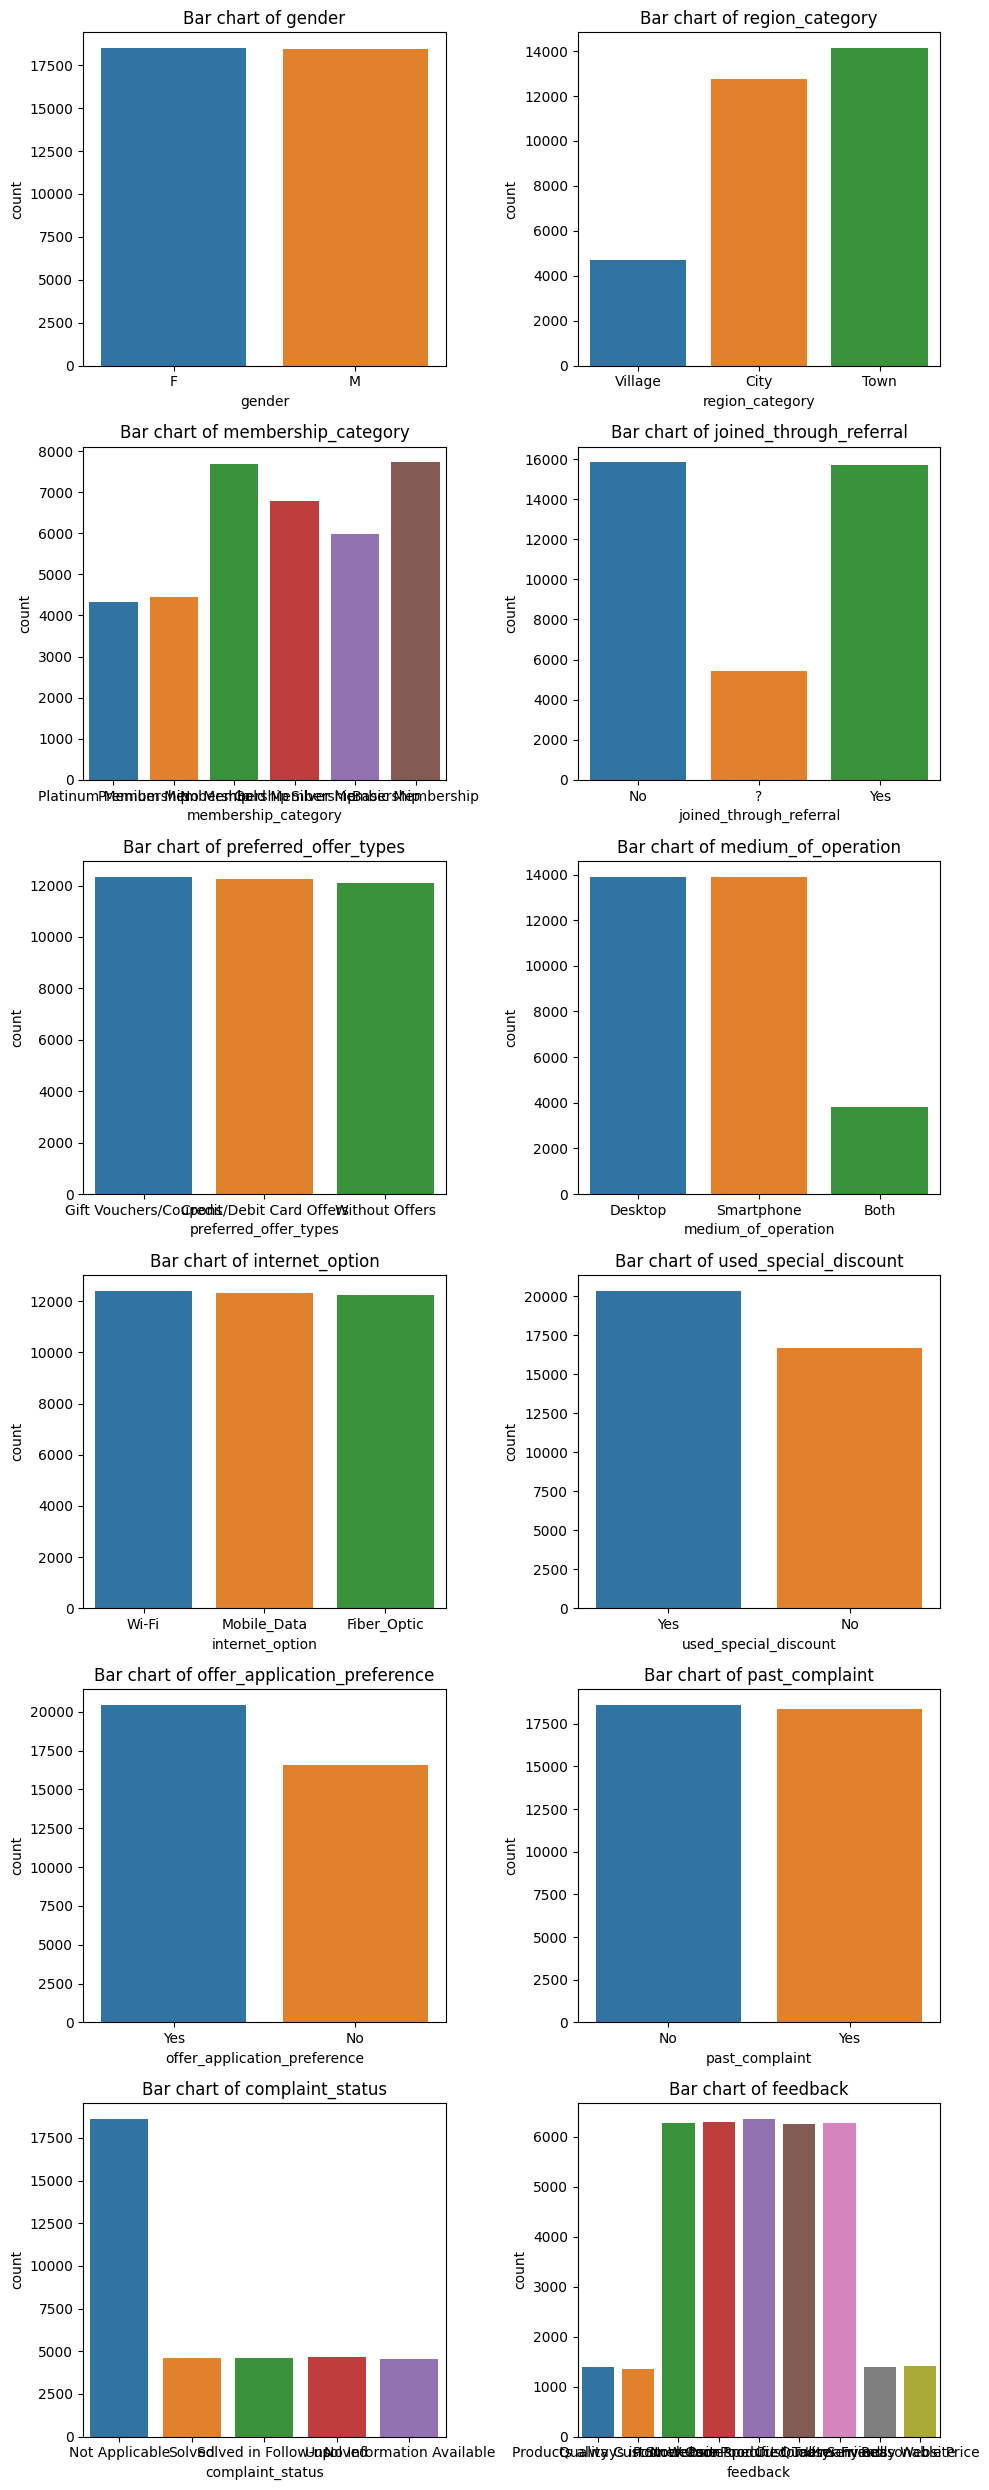

In [166]:
fig, ax = plt.subplots(categorical_cols.shape[0], categorical_cols.shape[1], figsize = (10,25))

for i in range(categorical_cols.shape[0]):
    for j in range(categorical_cols.shape[1]):
        if categorical_cols[i, j] == '':
            continue
        sns.countplot(data = data_visual, x = categorical_cols[i,j], ax = ax[i, j])
        ax[i, j].set_title('Bar chart of ' + categorical_cols[i,j])

plt.tight_layout()
plt.show()

<ipython-input-167-73fd74d0bc85>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_visual.corr())


<Axes: >

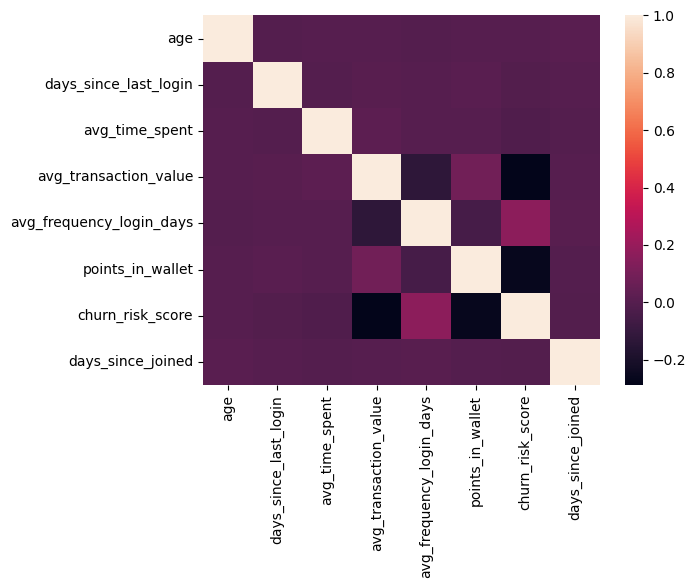

In [167]:
sns.heatmap(data_visual.corr())

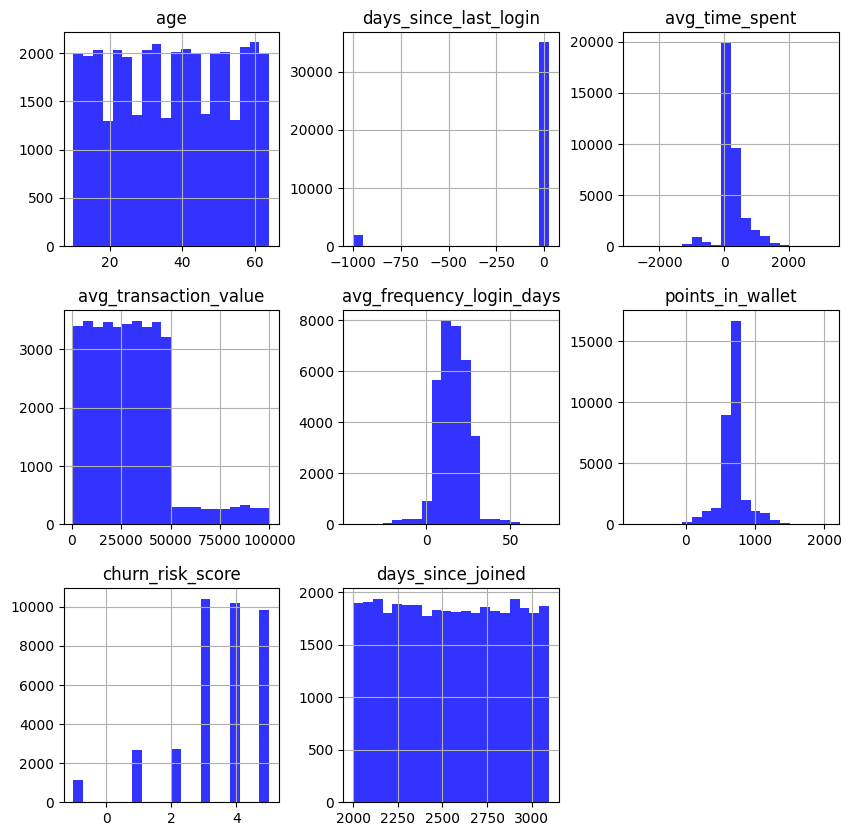

In [168]:
data_visual.hist(figsize=(10, 10),grid=True,bins=20,alpha=0.8,color='blue')
plt.show()

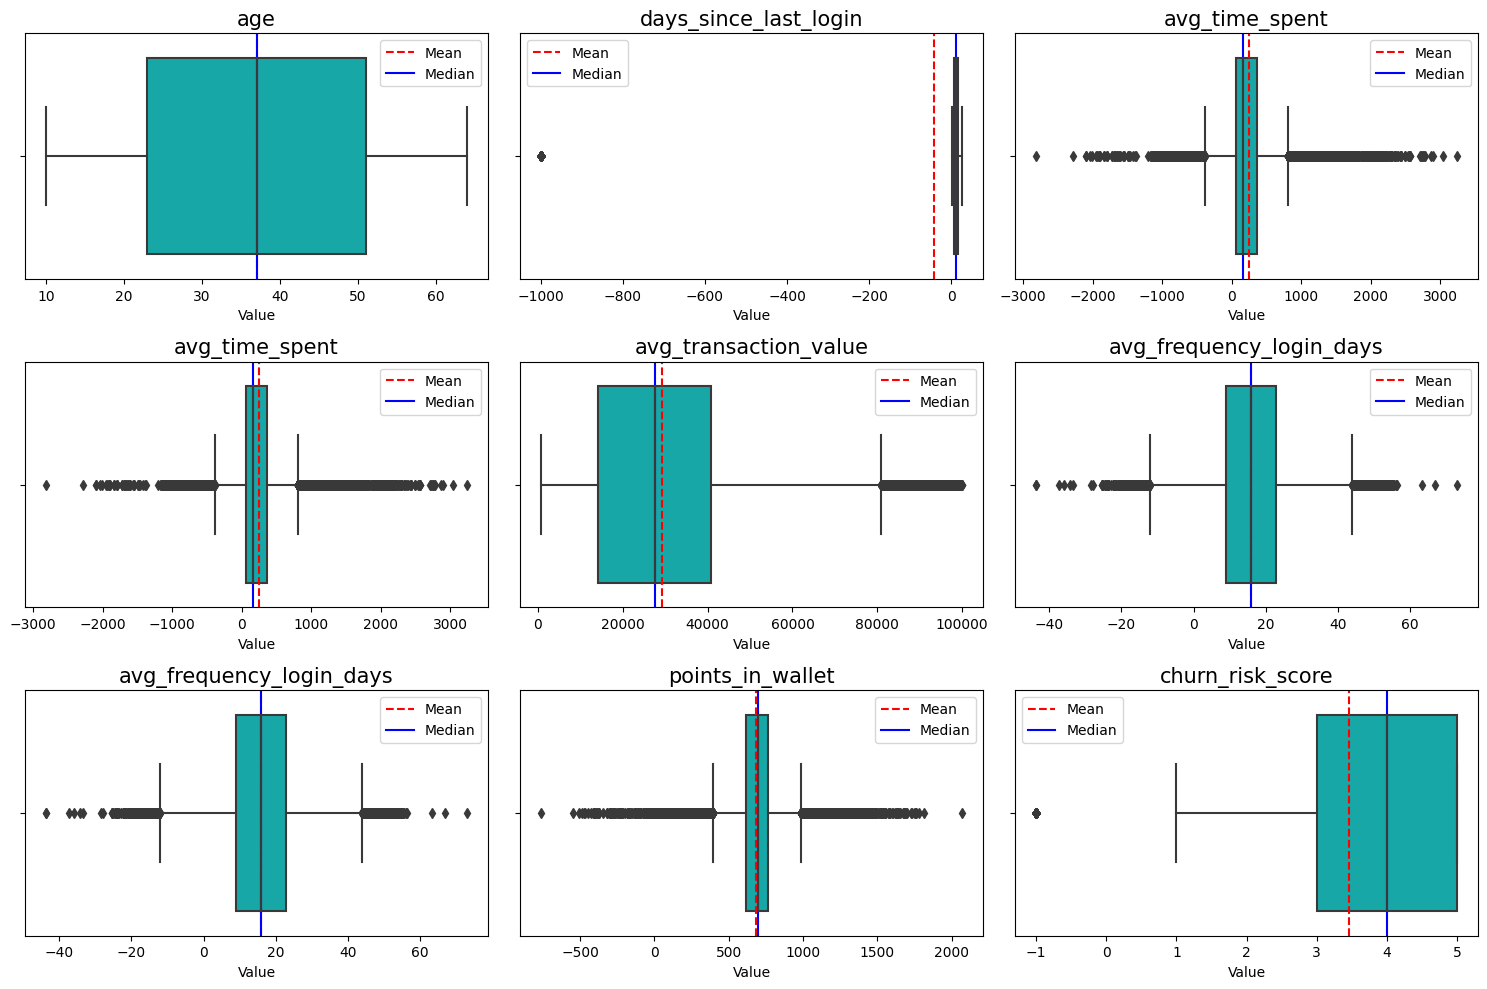

In [169]:
numeric_cols = data_visual.select_dtypes(include='number').columns
numeric_cols
def boxplot_numerical_features(data_visual, continous_columns):
    l = len(continous_columns)
    n = 3
    row = lambda l, n: int(l/n) if l%n==0 else int(int(l/n)+1)
    m = row(l, n)
    # set position for figure
    fig , ax = plt.subplots(m,n, figsize=(15,10))
    if ( m <= 1):
        for j in range(n):
            index = j
            if index >= len(continous_columns):
                break
            mean = data_visual[continous_columns[index]].describe()['mean']
            median = data_visual[continous_columns[index]].describe()['50%']
            sns.boxplot(x=continous_columns[index], data =data_visual, ax=ax[index], color='c')
            ax[index].axvline(mean, label='Mean', color='r', linestyle='dashed')
            ax[index].axvline(median, label='Median', color='b')
            ax[index].set_title(f"{continous_columns[index]}", fontsize=15)
            ax[index].set_xlabel('Value')
            ax[index].legend()
    else:
        for i in range(m):
            for j in range(n):
                index = 2*i + j
                if index >= len(continous_columns):
                    break
                mean = data_visual[continous_columns[index]].describe()['mean']
                median = data_visual[continous_columns[index]].describe()['50%']
                sns.boxplot(x=continous_columns[index], data =data_visual, ax=ax[i, j], color='c')
                ax[i, j].axvline(mean, label='Mean', color='r', linestyle='dashed')
                ax[i, j].axvline(median, label='Median', color='b')
                ax[i, j].set_title(f"{continous_columns[index]}", fontsize=15)
                ax[i, j].set_xlabel('Value')
                ax[i, j].legend()
    plt.tight_layout()
    plt.show()
boxplot_numerical_features(data_visual, numeric_cols)

- avg_time_spent, avg_transaction_value, points_in wallet ,avg_frequency_login_days have too much outliers
- churn_risk_score have a little values -1

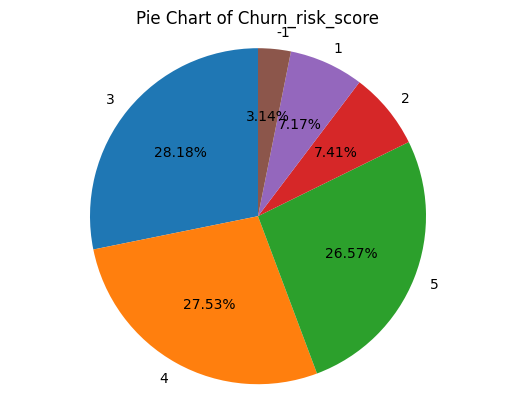

In [170]:
label_target = dataset_train_copy['churn_risk_score'].value_counts().index.to_list()
plt.pie(dataset_train_copy['churn_risk_score'].value_counts(), labels=label_target, autopct='%.2f%%', startangle=90)
plt.axis('equal')
plt.title('Pie Chart of Churn_risk_score')
plt.show()

#Encoder

In [171]:
dataset_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [172]:
# Check for NaN data
display(dataset_train_copy.isnull().sum())

customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [173]:
# Dropping all rows whose 'avg_time_spent' is negative
low = np.where(dataset_train_copy['avg_time_spent'] < 0)
dataset_train_copy.drop(low[0],inplace=True)
# Reseting the default index
dataset_train_copy.index = range(0,dataset_train_copy.shape[0])

# Dropping all rows whose 'points_in_wallet' is negative
l1 = np.where(dataset_train_copy['points_in_wallet'] < 0)
dataset_train_copy.drop(l1[0],inplace=True)
dataset_train_copy.index = range(0,dataset_train_copy.shape[0])

# Dropping all rows whose 'avg_transaction_value' is negative
l2 = np.where(dataset_train_copy['avg_transaction_value'] < 0)
dataset_train_copy.drop(l2[0],inplace=True)
dataset_train_copy.index = range(0,dataset_train_copy.shape[0])

# Dropping all rows whose 'days_since_last_login' is negative
l3 = np.where(dataset_train_copy['days_since_last_login'] < 0)
dataset_train_copy.drop(l3[0],inplace=True)
dataset_train_copy.index = range(0,dataset_train_copy.shape[0])

# Removing all the rows having 'churn_risk_score' == -1
l4 = np.where(dataset_train_copy['churn_risk_score'] == -1)
dataset_train_copy.drop(l4[0],inplace=True)
dataset_train_copy.index = range(0,dataset_train_copy.shape[0])

In [174]:
# class distribution
print(dataset_train_copy.groupby('churn_risk_score').size())

churn_risk_score
1    2413
2    2471
3    9395
4    9113
5    8802
dtype: int64


In [175]:
dataset_train_copy=dataset_train_copy.fillna(method='ffill')  #Filling Null values using Forward Fill Method

In [176]:
display(dataset_train_copy.isnull().sum())

customer_id                     0
Name                            0
age                             0
gender                          0
security_no                     0
region_category                 0
membership_category             0
joining_date                    0
joined_through_referral         0
referral_id                     0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
last_visit_time                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
churn_risk_score                0
dtype: int64

In [177]:
print(dataset_train_copy['membership_category'].value_counts())

Basic Membership       6701
No Membership          6663
Gold Membership        5937
Silver Membership      5229
Premium Membership     3877
Platinum Membership    3787
Name: membership_category, dtype: int64


In [178]:
dataset_train_encoded = dataset_train_copy.copy()
categ = ['gender','joined_through_referral','preferred_offer_types','medium_of_operation','internet_option','region_category','membership_category','avg_frequency_login_days','used_special_discount','offer_application_preference','past_complaint','complaint_status','feedback']
encoder = LabelEncoder()
dataset_train_encoded[categ] = dataset_train_encoded[categ].apply(encoder.fit_transform)
dataset_train_encoded.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,0,XW0DQ7H,2,3,2017-08-17,1,xxxxxxxx,...,300.63,53005.25,628,781.75,1,1,0,1,4,2
1,fffe43004900440032003100300035003700,Traci Peery,32,0,5K0N3X1,0,4,2017-08-28,0,CID21329,...,306.34,12838.38,617,781.75,1,0,1,2,5,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,0,1F2TCL3,1,2,2016-11-11,2,CID12313,...,516.16,21027.00,658,500.69,0,1,1,3,3,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,1,VJGJ33N,0,2,2016-10-29,2,CID3793,...,53.27,25239.56,1400,567.66,0,1,1,4,3,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,0,SVZXCWB,0,2,2017-09-12,1,xxxxxxxx,...,113.13,24483.66,627,663.06,0,1,1,2,3,5


In [179]:
print(encoder.classes_)

['No reason specified' 'Poor Customer Service' 'Poor Product Quality'
 'Poor Website' 'Products always in Stock' 'Quality Customer Care'
 'Reasonable Price' 'Too many ads' 'User Friendly Website']


In [180]:
corr=dataset_train_encoded.corr()["churn_risk_score"].abs().sort_values(ascending=False)
corr

<ipython-input-180-56432c08883c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=dataset_train_encoded.corr()["churn_risk_score"].abs().sort_values(ascending=False)


churn_risk_score                1.000000
membership_category             0.440104
avg_transaction_value           0.363690
feedback                        0.337454
points_in_wallet                0.302852
offer_application_preference    0.038766
preferred_offer_types           0.037590
avg_frequency_login_days        0.035780
days_since_last_login           0.033287
joined_through_referral         0.030665
region_category                 0.027722
avg_time_spent                  0.027328
medium_of_operation             0.019976
past_complaint                  0.012077
used_special_discount           0.008255
gender                          0.005359
internet_option                 0.004766
complaint_status                0.004404
age                             0.000609
Name: churn_risk_score, dtype: float64

##Remove_outlier

In [181]:
def remove_outlier(data, feature, lower_bound, upper_bound):
    Q1 = data[feature].quantile(lower_bound) # or Q1 = np.percentile(df['column'], 0.25)
    Q3 = data[feature].quantile(upper_bound)
    IQR = Q3 - Q1
    lower_extreme = Q1 - 1.5*IQR
    upper_extreme = Q3 + 1.5*IQR

    outliers = data[(data[feature] < lower_extreme) | (data[feature] > upper_extreme)]
    percent_outliers = len(outliers) / len(data) * 100
    print('Percent of outlier in',feature,':',percent_outliers)

    data = data.drop(outliers.index)

    return data



In [211]:
dataset_train_encoded = remove_outlier(dataset_train_encoded, 'avg_transaction_value', 0.25, 0.75)
dataset_train_encoded = remove_outlier(dataset_train_encoded, 'avg_frequency_login_days', 0.25, 0.75)
dataset_train_encoded = remove_outlier(dataset_train_encoded, 'avg_time_spent', 0.25, 0.75)
dataset_train_encoded = remove_outlier(dataset_train_encoded, 'points_in_wallet', 0.25, 0.75)

Percent of outlier in avg_transaction_value : 0.0
Percent of outlier in avg_frequency_login_days : 0.0
Percent of outlier in avg_time_spent : 0.41760918740212283
Percent of outlier in points_in_wallet : 0.004368338284116722


In [212]:
#split dataset in features and target variable
feature_cols = ['region_category','membership_category',
'avg_time_spent',
'avg_transaction_value',
'points_in_wallet','complaint_status',
'feedback'
]
X = dataset_train_encoded[feature_cols] # Features
y = dataset_train_encoded.churn_risk_score # Target variable

#Modeling

In [184]:
pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [213]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import PowerTransformer
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

def evaluate_model(y_true, y_pred):
    print("accuracy", accuracy_score(y_true, y_pred))
    print("precision", precision_score(y_true, y_pred, average = 'weighted'))
    print("recall", recall_score(y_true, y_pred, average = 'weighted'))
    print("F1", f1_score(y_true, y_pred, average = 'weighted'))
    report = classification_report(y_true, y_pred)
    print("Classification Report\n",report)

    cm = confusion_matrix(y_true,y_pred)

In [214]:
# Applying SMOTEN Over Sampling Strategy
from imblearn.over_sampling import SMOTEN
oversampler = SMOTEN()
X_ov,y_ov = oversampler.fit_resample(X,y)
print('The dataset before oversampling: ',X.shape,y.shape)
print('The dataset after oversampling: ',X_ov.shape,y_ov.shape)

The dataset before oversampling:  (22891, 7) (22891,)
The dataset after oversampling:  (35030, 7) (35030,)


In [215]:
# Now we are having equally balanced target labels
print(sum(y == 1),sum(y_ov == 1))
print(sum(y == 2),sum(y_ov == 2))
print(sum(y == 3),sum(y_ov == 3))
print(sum(y == 4),sum(y_ov == 4))
print(sum(y == 5),sum(y_ov == 5))

1315 7006
1367 7006
7006 7006
6639 7006
6564 7006


##Train and test

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X_ov,y_ov, test_size=0.3, random_state=42) # 70% training and 30% test

##Decision Tree Classifier

In [217]:
dt=DecisionTreeClassifier(min_samples_split=100,random_state = 1)
dt=dt.fit(X_train,y_train)
dt_pred=dt.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, dt_pred)*100)

Accuracy: 84.95575221238938


In [218]:
evaluate_model(dt_pred, y_test)

accuracy 0.8495575221238938
precision 0.8498177266596817
recall 0.8495575221238938
F1 0.849580451338045
Classification Report
               precision    recall  f1-score   support

           1       0.93      0.90      0.92      2138
           2       0.90      0.93      0.92      2094
           3       0.94      0.93      0.94      2105
           4       0.70      0.70      0.70      2039
           5       0.77      0.77      0.77      2133

    accuracy                           0.85     10509
   macro avg       0.85      0.85      0.85     10509
weighted avg       0.85      0.85      0.85     10509



##Random Forest Classifier

In [191]:
rfc=RandomForestClassifier(n_estimators=1000,max_depth=25)
rfc=rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, rfc_pred)*100)

Accuracy: 85.96956829440906


In [192]:
evaluate_model(rfc_pred, y_test)

accuracy 0.8596956829440906
precision 0.8627772421928473
recall 0.8596956829440906
F1 0.8607880640674932
Classification Report
               precision    recall  f1-score   support

           1       0.97      0.95      0.96      2315
           2       0.95      0.97      0.96      2218
           3       0.94      0.91      0.92      2271
           4       0.66      0.72      0.69      2126
           5       0.79      0.75      0.77      2374

    accuracy                           0.86     11304
   macro avg       0.86      0.86      0.86     11304
weighted avg       0.86      0.86      0.86     11304



#SVM

In [219]:
#Create a pipe before train model svm
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Data standardization
    ('svm', SVC(kernel='rbf'))  # SVM with kernel RBF
])

# Train the model on the training set
pipeline.fit(X_train, y_train)

# Label prediction for test set
y_pred = pipeline.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 73.9461414026073


In [220]:
evaluate_model(y_pred, y_test)

accuracy 0.7394614140260729
precision 0.7443065843747317
recall 0.7394614140260729
F1 0.7401095812149366
Classification Report
               precision    recall  f1-score   support

           1       0.84      0.78      0.81      2235
           2       0.79      0.77      0.78      2222
           3       0.77      0.80      0.79      2025
           4       0.68      0.61      0.64      2266
           5       0.61      0.74      0.67      1761

    accuracy                           0.74     10509
   macro avg       0.74      0.74      0.74     10509
weighted avg       0.74      0.74      0.74     10509



#Conslution

- Main metrics is accuracy because it's preferable to have a model that does not miss any churns, But i have try build another model(Decision tree and Random Forest Classifier) and the accuaracy is good choice. However the accuaracy another model is better than SVM, But it's just a little.
- So i think use model SVM in data is fine
- Random forest is the best choice in data